# [데이터셋 불러오기](https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html)

- torchvision.datasets
  - root={data save path]
  - train={select train or test data}
    - True: train data set
    - False: Test data set
  - download={if root dir has no data download from webserver}
    - True: download from webserver
    - False: don't download from webserver
  - transform={Data set format}

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.FashionMNIST(
    root="../data/FashionMNIST",
    train=True,
    download=True,
    transform=ToTensor()
)

In [3]:
test_data = datasets.FashionMNIST(
    root="../data/FashionMNIST/",
    train=False,
    download=True,
    transform=ToTensor()
)

image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])
image shape :torch.Size([1, 28, 28])


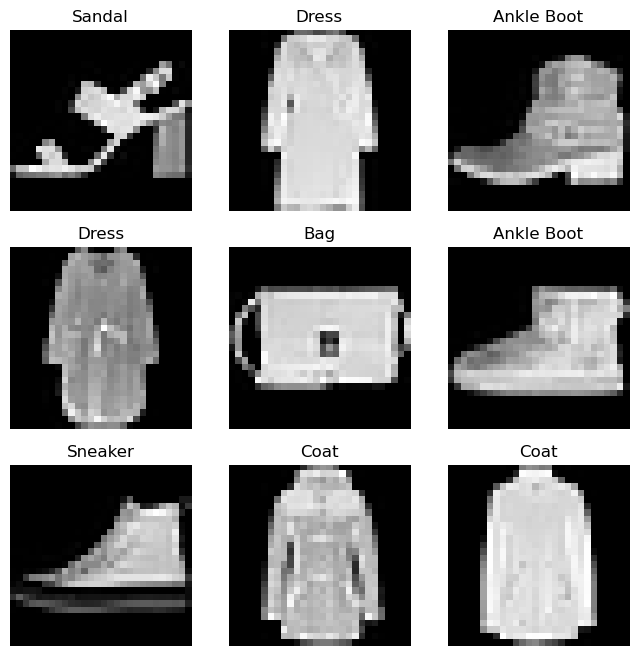

In [4]:
from cmath import cos


labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx =  torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    print(f"image shape :{img.shape}")
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## Creating a Custom Dataset for your files

A custom dataset class must implement three function ```__init__, __len__, __getitem__```

### ```__init__```
Run only once when instantiating the Dataset object.
- Initialize
  - The directory containing the images and annotations file
  - Both transforms

### ```__len__```
Return the nmber of samples in dataset

### ```__getitem__```
Load and return a sample frome the dataset at the given iindex{idx}
- Image Path = os.path.join({Image directory}, {Image file name})
  - Image directory: img_dir
  - Image file name: img_labels.iloc[idx, 0]
- Image = read_image({Image Path})
- label = img_lables.iloc[idx, 1]

The labels.csv file looks like
```
{image1}, {label1}
{image2}, {label2}
{image3}, {label4}
{image4}, {label5}
......
{image}, {label}
```

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

In [6]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        lable = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing data with DataLoaders

Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.

DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.

- data의 feature와 labeldmf batch_size만크씩 묶어 minibatch로 만들어준다.
- 1epoch의 모든 iter가 종료되면 overfit을 맊기위해 다시 shuffle할 수 있다.(shuffle=True)


In [17]:
from torch.utils.data import DataLoader

bat_size = 64
train_dataloader = DataLoader(train_data, batch_size=bat_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=bat_size, shuffle=True)


## Iterate through the DataLoader
- Dataloader에 불러온 Dataset을 1iterate단위로 불러 올 수 있음(iter(Dataloader))
- 각 iteration의 Data는 batch_size만큼의 size를 갖는 feature와 label의 묶음(batch)를 반환
- **shuffle=True**일 경우 모든 batch를 불러온 후 Dataloader의 batch를 shuffle해줌

- torch.squeeze(): 차원이 1인 부분을 제거해줌
- torch.squeeze(dim = n): "n"차원바로 뒤에 크기가1인 dimension을 추가해줌(Default=0)

Feature shape: torch.Size([1, 28, 28])
Label batch: tensor([7, 2, 4, 8, 1, 7, 0, 3, 2, 6, 0, 7, 8, 3, 5, 9, 1, 6, 9, 3, 2, 7, 3, 4,
        4, 1, 6, 6, 9, 1, 9, 4, 3, 8, 6, 9, 9, 1, 3, 7, 7, 6, 3, 7, 9, 6, 0, 1,
        9, 1, 2, 7, 5, 9, 3, 7, 2, 7, 5, 2, 8, 0, 0, 1])
Feature shape szueeze: torch.Size([28, 28])


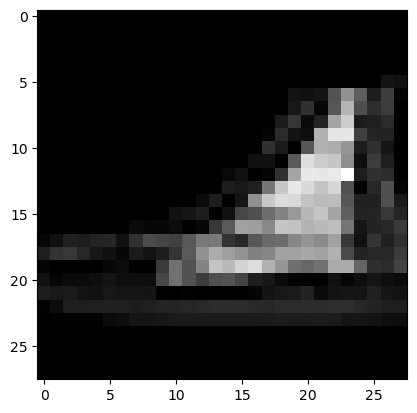

Label: 7


In [21]:
train_feature, train_label = next(iter(train_dataloader))
# print(f"Feature batch: {train_feature}")
print(f"Feature shape: {train_feature[0].size()}")
print(f"Label batch: {train_label}")
img=train_feature[0].squeeze()
print(f"Feature shape szueeze: {img.size()}")

label = train_label[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")